# Data Processing

Take bird data set from kaggle (approximately 50k images) 224 x 224 and create second data set of low resolution images. Due to computational time, all code and data will use a subset of this (approimately 2000 high resolution images) which are then used to create a low resolution data set. Both data sets are then converted to tensors and fed into the baseline model. 

(Note do not run code block 3 to 7. These were simply used to create the low resolution data set. Simply mount your drive and change file paths as needed when uploading image folders)

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import torch
import numpy as np
import csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#code to rename all individual picutres unique so they can be etracted an put into one file in order to generate a low resolution image set
'''
def main():
    path = "/content/drive/MyDrive/APS360/Test_Bird_Data_2/LR"
    count = 1

    for root, dirs, files in os.walk(path):
        for i in files:
            os.rename(os.path.join(root, i), os.path.join(root, "changed" + str(count) + ".jpg"))
            count += 1


if __name__ == '__main__':
    main()
'''

'\ndef main():\n    path = "/content/drive/MyDrive/APS360/Test_Bird_Data_2/LR"\n    count = 1\n\n    for root, dirs, files in os.walk(path):\n        for i in files:\n            os.rename(os.path.join(root, i), os.path.join(root, "changed" + str(count) + ".jpg"))\n            count += 1\n\n\nif __name__ == \'__main__\':\n    main()\n'

In [ ]:
#testing image quality functionality
image_path = "/content/drive/MyDrive/APS360/Bird_Data_HR/HR/changed1.jpg"
#image_path = "/content/drive/MyDrive/APS360/APS360 Project/Code and Data//Bird_Data_HR/HR/changed1.jpg"
image_file = Image.open(image_path)
image_file.save("image_name1.jpg", quality=25)

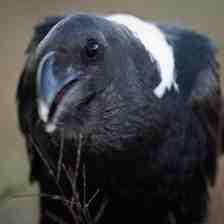

In [ ]:
#display low resolution changed image
#testing image save function (note image_name2 may not exist) 
image_file = Image.open("/content/image_name1.jpg")
image_file

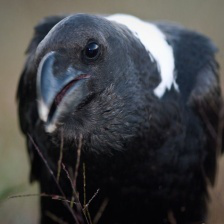

In [ ]:
#display original high resolution image
image_file = Image.open("/content/drive/MyDrive/APS360/Bird_Data_HR/HR/changed1.jpg")
image_file

In [ ]:
#loop through each image in low resolution bird data 2 set and convert to image of quality 25
'''
import os
directory = '/content/drive/MyDrive/APS360/Bird_Data_HR/HR'

for filename in os.listdir(directory):
    if filename.endswith(".jpg"):
      image_path = "/content/drive/MyDrive/APS360/Bird_Data_HR/HR/" + filename
      image_file = Image.open(image_path)
      image_file.save("Bird_Data_LR/" + filename, quality=25)
      continue
    else:
      continue
'''

In [ ]:
#convert low res data to zip file for download
#!zip -r /content/Bird_Data_LR.zip /content/drive/MyDrive/APS360/Bird_Data_LR

Convert High and low resolution data sets into tensors

In [ ]:
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets, transforms
import torch.optim as optim
from torch.utils.data.sampler import SubsetRandomSampler

#transforming high resolution data to tensors and is labeled
HRdataset = torchvision.datasets.ImageFolder('/content/drive/MyDrive/APS360/Bird_Data_HR', transform=transforms.ToTensor())
#HRdataset = torchvision.datasets.ImageFolder('/content/drive/MyDrive/APS360/APS360 Project/Code and Data/Bird_data', transform=transforms.ToTensor())

#transforming low resolution data to tensors 
LRdataset = torchvision.datasets.ImageFolder('/content/drive/MyDrive/APS360/Bird_Data_LR', transform=transforms.ToTensor())
#LRdataset = torchvision.datasets.ImageFolder('/content/drive/MyDrive/APS360/APS360 Project/Code and Data/Bird_Data_LR', transform=transforms.ToTensor())

In [ ]:
LRdataset[0]

(tensor([[[0.4275, 0.4275, 0.4275,  ..., 0.4745, 0.4745, 0.4745],
          [0.4275, 0.4275, 0.4314,  ..., 0.4745, 0.4745, 0.4745],
          [0.4314, 0.4314, 0.4314,  ..., 0.4745, 0.4745, 0.4745],
          ...,
          [0.3608, 0.3608, 0.3647,  ..., 0.3647, 0.3569, 0.3529],
          [0.3686, 0.3686, 0.3765,  ..., 0.3725, 0.3647, 0.3569],
          [0.3686, 0.3686, 0.3765,  ..., 0.3843, 0.3765, 0.3686]],
 
         [[0.4039, 0.4039, 0.4039,  ..., 0.4667, 0.4667, 0.4667],
          [0.4039, 0.4039, 0.4078,  ..., 0.4667, 0.4667, 0.4667],
          [0.4078, 0.4078, 0.4078,  ..., 0.4667, 0.4667, 0.4667],
          ...,
          [0.3451, 0.3451, 0.3490,  ..., 0.2980, 0.2902, 0.2902],
          [0.3451, 0.3451, 0.3490,  ..., 0.3059, 0.2980, 0.2941],
          [0.3451, 0.3451, 0.3490,  ..., 0.3176, 0.3098, 0.3059]],
 
         [[0.3569, 0.3569, 0.3569,  ..., 0.4157, 0.4157, 0.4157],
          [0.3569, 0.3569, 0.3608,  ..., 0.4157, 0.4157, 0.4157],
          [0.3608, 0.3608, 0.3608,  ...,

Visualizing Labeled High Resolution Dataset

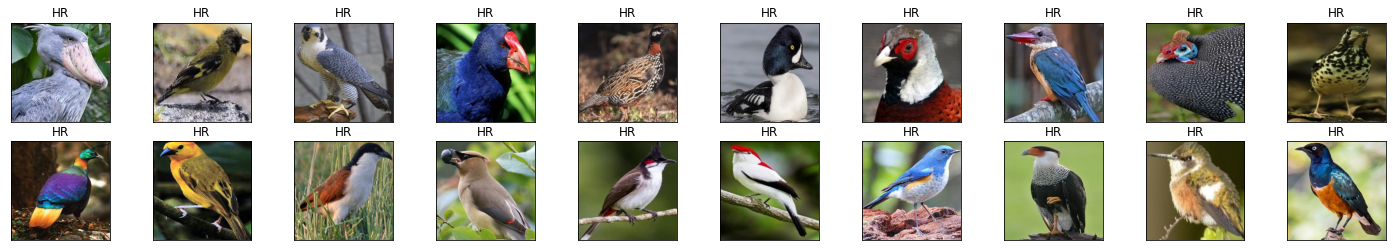

In [ ]:
# define dataloader parameters
batch_size  = 256
num_workers = 0

# prepare data loaders
train_loader = torch.utils.data.DataLoader(HRdataset, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)

# Visualize some sample data

# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

classes = ['HR', 'LR']
# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx], (1, 2, 0)))
    ax.set_title(classes[labels[idx]])

Visualizing Low Resolution Dataset

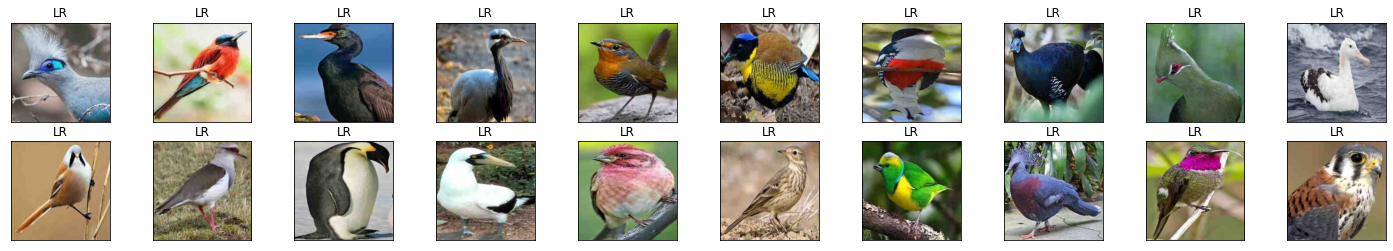

In [ ]:
# define dataloader parameters
batch_size  = 256
num_workers = 0

# prepare data loaders
train_loader2 = torch.utils.data.DataLoader(LRdataset, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)

# Visualize some sample data

# obtain one batch of training images
dataiter = iter(train_loader2)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

classes = ['HR', 'LR']
# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx], (1, 2, 0)))
    ax.set_title(classes[1])
    

# Baseline GANs Model

In [ ]:
# Do set your runtime to GPU. You will need it
import torch
import math
from os import listdir
import numpy as np
from torch.autograd import Variable
from torchvision.transforms import Compose, RandomCrop, ToTensor, ToPILImage, CenterCrop, Resize
from torch.utils.data import DataLoader, Dataset
from PIL import Image
from os.path import join
torch.autograd.set_detect_anomaly(True)

In [ ]:
UPSCALE_FACTOR = 4
CROP_SIZE = 88
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])

In [ ]:
# Now, I will load in some code for the dataset and dataloaders.
def is_image_file(filename):
    return any(filename.endswith(extension) for extension in ['.png', '.jpg', '.jpeg', '.PNG', '.JPG', '.JPEG'])


def calculate_valid_crop_size(crop_size, upscale_factor):
    return crop_size - (crop_size % upscale_factor)


def train_hr_transform(crop_size):
    return Compose([
        RandomCrop(crop_size),
        ToTensor(),
    ])


def train_lr_transform(crop_size, upscale_factor):
    return Compose([
        ToPILImage(),
        Resize(crop_size // upscale_factor, interpolation=Image.BICUBIC),
        ToTensor()
    ])


def display_transform():
    return Compose([
        ToPILImage(),
        Resize(400),
        CenterCrop(400),
        ToTensor()
    ])


class TrainDatasetFromFolder(Dataset):
    def __init__(self, dataset_dir, crop_size, upscale_factor):
        super(TrainDatasetFromFolder, self).__init__()
        self.image_filenames = [join(dataset_dir, x) for x in listdir(dataset_dir) if is_image_file(x)]
        crop_size = calculate_valid_crop_size(crop_size, upscale_factor)
        self.hr_transform = train_hr_transform(crop_size)
        self.lr_transform = train_lr_transform(crop_size, upscale_factor)

    def __getitem__(self, index):
        hr_image = self.hr_transform(Image.open(self.image_filenames[index]))
        lr_image = self.lr_transform(hr_image)
        return lr_image, hr_image

    def __len__(self):
        return len(self.image_filenames)

In [ ]:
train_set = TrainDatasetFromFolder('/content/drive/MyDrive/APS360/Bird_Data_HR/HR', crop_size=CROP_SIZE,
                                   upscale_factor=UPSCALE_FACTOR)
trainloader = DataLoader(train_set, batch_size=64, num_workers=4, shuffle=True)

/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:288: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
from torch import nn, optim

In [ ]:
# Now we will start implementing the model. We will start in this vid, and co,plee
# in the next video
class ResidualBlock(nn.Module):
  def __init__(self, channels):
    super(ResidualBlock, self).__init__()
    self.conv1 = nn.Conv2d(channels, channels, kernel_size=3, padding=1)
    self.bn1 = nn.BatchNorm2d(channels)
    self.prelu = nn.PReLU()
    self.conv2 = nn.Conv2d(channels, channels, kernel_size=3, padding=1)
    self.bn2 = nn.BatchNorm2d(channels)
  def forward(self, x):
    residual = self.conv1(x)
    residual = self.bn1(residual)
    residual = self.prelu(residual)
    residual = self.conv2(residual)
    residual = self.bn2(residual)
    return x + residual
  
# We just implemented a pretty standard residual block here

In [ ]:
class UpsampleBlock(nn.Module):
  def __init__(self, in_channels, up_scale):
    super(UpsampleBlock, self).__init__()
    self.conv = nn.Conv2d(in_channels, in_channels * up_scale ** 2, 
                          kernel_size=3, padding=1)
    self.pixel_shuffle = nn.PixelShuffle(up_scale)
    self.prelu = nn.PReLU()
  def forward(self, x):
    x = self.conv(x)
    x = self.pixel_shuffle(x)
    x = self.prelu(x)
    return x

In [ ]:
class Generator(nn.Module):
  def __init__(self, scale_factor):
    super(Generator, self).__init__()
    upsample_block_num = int(math.log(scale_factor, 2))

    self.block1 = nn.Sequential(
        nn.Conv2d(3, 64, kernel_size=9, padding=4),
        nn.PReLU()
    )

    self.block2 = ResidualBlock(64)
    self.block3 = ResidualBlock(64)
    self.block4 = ResidualBlock(64)
    self.block5 = ResidualBlock(64)
    self.block6 = ResidualBlock(64)
    self.block7 = nn.Sequential(
        nn.Conv2d(64, 64, kernel_size=3, padding=1),
        nn.BatchNorm2d(64)
    )
    block8 = [UpsampleBlock(64, 2) for _ in range(upsample_block_num)]
    block8.append(nn.Conv2d(64, 3, kernel_size=9, padding=4))
    self.block8 = nn.Sequential(*block8)
  def forward(self, x):
    block1 = self.block1(x)
    block2 = self.block2(block1)
    block3 = self.block3(block2)
    block4 = self.block4(block3)
    block5 = self.block5(block4)
    block6 = self.block6(block5)
    block7 = self.block7(block6)
    block8 = self.block8(block1 + block7)
    return (torch.tanh(block8) + 1) / 2

In [ ]:
class Discriminator(nn.Module):
  def __init__(self):
    super(Discriminator, self).__init__()
    self.net = nn.Sequential(
        nn.Conv2d(3, 64, kernel_size=3, padding=1),
        nn.LeakyReLU(0.2),

        nn.Conv2d(64, 64, kernel_size=3, stride=2, padding=1),
        nn.BatchNorm2d(64),
        nn.LeakyReLU(0.2),

        nn.Conv2d(64, 128, kernel_size=3, padding=1),
        nn.BatchNorm2d(128),
        nn.LeakyReLU(0.2),

        nn.Conv2d(128, 256, kernel_size=3, padding=1),
        nn.BatchNorm2d(256),
        nn.LeakyReLU(0.2),

        nn.Conv2d(256, 256, kernel_size=3, stride=2, padding=1),
        nn.BatchNorm2d(256),
        nn.LeakyReLU(0.2),

        nn.Conv2d(256, 512, kernel_size=3, padding=1),
        nn.BatchNorm2d(512),
        nn.LeakyReLU(0.2),

        nn.Conv2d(512, 512, kernel_size=3, stride=2, padding=1),
        nn.BatchNorm2d(512),
        nn.LeakyReLU(0.2),

        nn.AdaptiveAvgPool2d(1),
        nn.Conv2d(512, 1024, kernel_size=1),
        nn.LeakyReLU(0.2),
        nn.Conv2d(1024, 1, kernel_size=1)
    )
  def forward(self, x):
    batch_size=x.size()[0]
    return torch.sigmoid(self.net(x).view(batch_size))

In [ ]:
from torchvision.models.vgg import vgg16

In [ ]:
# Now we got to make the Generator Loss
class TVLoss(nn.Module):
  def __init__(self, tv_loss_weight=1):
    super(TVLoss, self).__init__()
    self.tv_loss_weight=tv_loss_weight
  def forward(self, x):
    batch_size=x.size()[0]
    h_x = x.size()[2]
    w_x = x.size()[3]

    count_h = self.tensor_size(x[:, :, 1:, :])
    count_w = self.tensor_size(x[:, :, :, 1:])

    h_tv = torch.pow(x[:, :, 1:, :] - x[:, :, :h_x - 1, :], 2).sum()
    w_tv = torch.pow(x[:, :, :, 1:] - x[:, :, :, :w_x - 1], 2).sum()
    return self.tv_loss_weight * 2 * (h_tv / count_h + w_tv / count_w) / batch_size
  
  # Forgot to implement an important method
  @staticmethod # Must add this
  def tensor_size(t):
    return t.size()[1] * t.size()[2] * t.size()[3]

In [ ]:
class GeneratorLoss(nn.Module):
  def __init__(self):
    super(GeneratorLoss, self).__init__()
    vgg = vgg16(pretrained=True)
    loss_network = nn.Sequential(*list(vgg.features)[:31]).eval()
    for param in loss_network.parameters():
      param.requires_grad = False
    self.loss_network = loss_network
    self.mse_loss = nn.MSELoss()
    self.tv_loss = TVLoss()
  def forward(self, out_labels, out_images, target_images):
    adversial_loss = torch.mean(1 - out_labels)
    perception_loss = self.mse_loss(out_images, target_images)
    image_loss = self.mse_loss(out_images, target_images)
    tv_loss = self.tv_loss(out_images)
    return image_loss + 0.001 * adversial_loss + 0.006 * perception_loss + 2e-8 * tv_loss

In [ ]:
device  = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Standard device selectoin
device

device(type='cuda')

In [ ]:
netG = Generator(UPSCALE_FACTOR)
netD = Discriminator()
generator_criterion = GeneratorLoss()
generator_criterion = generator_criterion.to(device)
netG = netG.to(device)
netD = netD.to(device)
optimizerG = optim.Adam(netG.parameters(), lr=0.0002)
optimizerD = optim.Adam(netD.parameters(), lr=0.0002)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

In [ ]:
results = {
    "d_loss":[],
    "g_loss":[],
    "d_score": [],
    "g_score": []
}

In [ ]:
## Now for training code
from tqdm import tqdm
import os

In [ ]:
N_EPOCHS = 50 # 150 is good enough for our model. gives decent enough results

In [ ]:
for epoch in range(1, N_EPOCHS + 1):
  train_bar = tqdm(trainloader)
  running_results = {'batch_sizes':0, 'd_loss':0,
                     "g_loss":0, "d_score":0, "g_score":0}

  netG.train()
  netD.train()
  for data, target in train_bar:
    g_update_first = True
    batch_size = data.size(0)
    running_results['batch_sizes'] += batch_size

    real_img = Variable(target)
    real_img = real_img.to(device)
    z = Variable(data)
    z = z.to(device)

    ## Update Discriminator ##
    fake_img = netG(z)
    netD.zero_grad()
    real_out = netD(real_img).mean()
    fake_out = netD(fake_img).mean()
    d_loss = 1 - real_out + fake_out
    d_loss.backward(retain_graph = True)
    optimizerD.step()
    
    ## Now update Generator
    fake_img = netG(z)
    fake_out = netD(fake_img).mean()
    netG.zero_grad()
    g_loss = generator_criterion(fake_out, fake_img, real_img)
    g_loss.backward()

    fake_img = netG(z)
    fake_out = netD(fake_img).mean()

    optimizerG.step()

    running_results['g_loss'] += g_loss.item() * batch_size
    running_results['d_loss'] += d_loss.item() * batch_size
    running_results['d_score'] += real_out.item() * batch_size
    running_results['g_score'] += real_out.item() * batch_size

    ## Updating the progress bar
    train_bar.set_description(desc="[%d/%d] Loss_D: %.4f Loss_G: %.4f D(x): %.4f D(G(z)): %.4f" % (
        epoch, N_EPOCHS, running_results['d_loss'] / running_results['batch_sizes'],
        running_results['g_loss'] / running_results['batch_sizes'],
        running_results['d_score'] / running_results['batch_sizes'],
        running_results['g_score'] / running_results['batch_sizes']
    ))
  netG.eval()

  0%|          | 0/32 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
[1/50] Loss_D: 0.6707 Loss_G: 0.0231 D(x): 0.6300 D(G(z)): 0.6300: 100%|██████████| 32/32 [01:40<00:00,  3.13s/it]
[2/50] Loss_D: 0.5844 Loss_G: 0.0114 D(x): 0.6646 D(G(z)): 0.6646: 100%|██████████| 32/32 [01:16<00:00,  2.40s/it]
[3/50] Loss_D: 0.0631 Loss_G: 0.0101 D(x): 0.9645 D(G(z)): 0.9645: 100%|██████████| 32/32 [01:17<00:00,  2.41s/it]
[4/50] Loss_D: 0.0108 Loss_G: 0.0088 D(x): 0.9945 D(G(z)): 0.9945: 100%|██████████| 32/32 [01:17<00:00,  2.42s/it]
[5/50] Loss_D: 0.0042 Loss_G: 0.0082 D(x): 0.9

# Additional Resources

In [ ]:
import torch
import torch.nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

import pytorch_lightning as pl

from torch_enhance.datasets import BSDS300, Set14, Set5
from torch_enhance.models import SRCNN
from torch_enhance.models import SRResNet
from torch_enhance import metrics

#test_data = torchvision.datasets.ImageFolder("/content/drive/My Drive/APS360/APS360 Project/Code and Data/AI_Upscale_Data1/Data", transform=transforms.ToTensor())

class Module(pl.LightningModule):

    def __init__(self, model):
        super().__init__()
        self.model = model

    def forward(self, x):
        return self.model(x)

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=1e-3)

    def training_step(self, batch, batch_idx):
        lr, hr = batch
        sr = self(lr)
        loss = F.mse_loss(sr, hr, reduction="mean")
        
        # metrics
        mae = metrics.mae(sr, hr)
        psnr = metrics.psnr(sr, hr)

        # Logs
        self.log("train_loss", loss)
        self.log("train_mae", mae)
        self.log("train_psnr", psnr)

        return loss

    def validation_step(self, batch, batch_idx):
        lr, hr = batch
        sr = self(lr)
        loss = F.mse_loss(sr, hr, reduction="mean")
        
        # metrics
        mae = metrics.mae(sr, hr)
        psnr = metrics.psnr(sr, hr)

        # Logs
        self.log("val_loss", loss)
        self.log("val_mae", mae)
        self.log("val_psnr", psnr)

        return loss

    def test_step(self, batch, batch_idx):
        lr, hr = batch
        sr = self(lr)
        loss = F.mse_loss(sr, hr, reduction="mean")
        
        # metrics
        mae = metrics.mae(sr, hr)
        psnr = metrics.psnr(sr, hr)

        # Logs
        self.log("test_loss", loss)
        self.log("test_mae", mae)
        self.log("test_psnr", psnr)

        return loss


if __name__ == '__main__':
    
    scale_factor = 2

    # Setup dataloaders
    train_dataset = BSDS300(scale_factor=scale_factor)
    val_dataset = Set14(scale_factor=scale_factor)
    #test_dataset = Set5(scale_factor=scale_factor)
    train_dataloader = DataLoader(train_dataset, batch_size=256)
    val_dataloader = DataLoader(val_dataset, batch_size=1)
    test_dataloader = DataLoader(LRdataset, batch_size=1)

    # Define model
    channels = 3 if train_dataset.color_space == "RGB" else 1
    model = SRResNet(scale_factor, channels)
    module = Module(model)


    trainer = pl.Trainer(max_epochs=0, gpus =1)
    ##500 epoch makes loss and mae a bit larger but psnr significantly decreases --> significant? 
    #trainer.fit(
        #module,
       # train_dataloader,
       # val_dataloader
   # )
    trainer.test(module, test_dataloader)


ModuleNotFoundError: ignored

In [ ]:
superRes = torch_enhance.models.SRResNet.enhance(model, LRdataset[0][0])

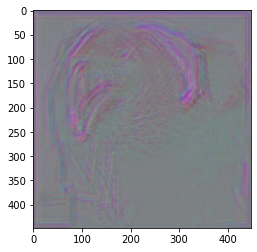

In [ ]:
plt.imshow(superRes.permute(1, 2, 0))

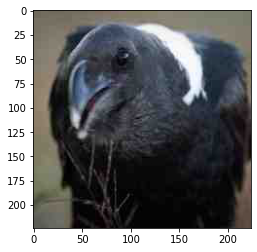

In [ ]:
plt.imshow(LRdataset[0][0].permute(1,2,0))